In [1]:
import numpy as np

In [78]:
class Bezier():
    def __init__(self, sampling = 100, max_order= 10):
        self.sampling = sampling
        sample = (np.arange(sampling)/(sampling-1)).reshape(-1,1)
        sample_complement = 1-sample
        self.weights = []
        pascal = np.array([1])
        for o in range(1, max_order+2):
            sample_power = sample**np.arange(o)[::-1]
            sample_complement_power = sample_complement**(np.arange(o))
            self.weights.append((sample_power*sample_complement_power)*pascal)
            pascal=np.concatenate([pascal, np.zeros((1))]) + np.concatenate([np.zeros((1)), pascal])
    
    def get_curve(self, points):
        if len(points.shape)<2:
            raise ValueError("expect 2 dim array")
        
        return np.dot(self.weights[points.shape[0]-1], points)

In [55]:
foo = Bezier()

In [74]:
points = np.array([[10,10], [10,20], [15, 20], [20,10], [30,10], [30,20]])
curve = foo.get_curve(points)

In [75]:
import matplotlib.pyplot as plt

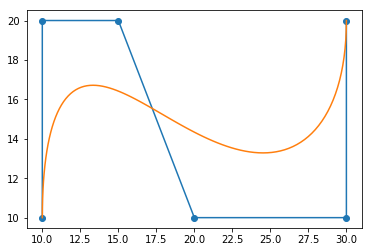

In [77]:
plt.scatter(points[:,0], points[:,1])
plt.plot(points[:,0], points[:,1])
plt.plot(curve[:,0], curve[:,1])
plt.show()

array([0., 1., 2., 0.])